#IE582_Fall21_Homework2

##Task 1 – Dimensionality reduction

In [2]:
# import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data=pd.read_csv('IE582_Fall21_HW2_q1_data.csv')
data.head()

,X1,X2,class
0,0.569483,0.822003,a
1,0.411469,0.911424,a
2,0.417385,-0.908730,a
3,-0.791828,0.610745,a
4,-0.806777,-0.590857,a


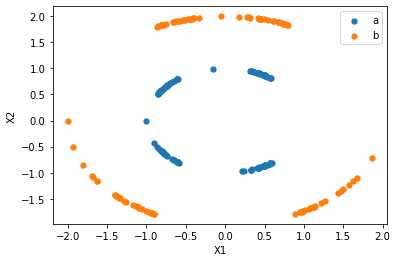

In [16]:
#Use hot encoder to make independent variable numeric
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

plt.scatter(X[y==0][:,0], X[y==0][:,1], lw=0, s=40, label='a')
plt.scatter(X[y==1][:,0], X[y==1][:,1], lw=0, s=40, label='b')
plt.legend()
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

### a) Apply PCA to reduce the number of dimensions to one and visualize the instances on a scatter plot. 

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
X = pca.fit_transform(X)
index =list(range(len(X)))

No handles with labels found to put in legend.


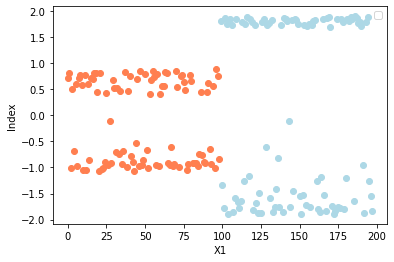

In [18]:
for i in range(len(X)):
    if y[i]==0:
      plt.scatter(index[i],X[i],c='coral')
    else:
      plt.scatter(index[i],X[i],c='lightblue')
plt.legend()
plt.xlabel("X1")
plt.ylabel("Index")
plt.show()

### b) Apply MDS to reduce the number of dimensions to one and visualize the instances on a scatter plot as in part (a).

In [24]:
# MDS with Manhattan Distance
from sklearn.manifold import MDS
from scipy.spatial import distance_matrix
from sklearn.metrics.pairwise import manhattan_distances
l1_dist_matrix = manhattan_distances(X)
mds = MDS(n_components=1, dissimilarity="precomputed")
X = mds.fit_transform(l1_dist_matrix)

No handles with labels found to put in legend.


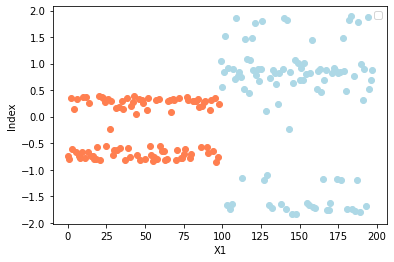

In [25]:
for i in range(len(X)):
    if y[i]==0:
      plt.scatter(index[i],X[i],c='coral')
    else:
      plt.scatter(index[i],X[i],c='lightblue')
plt.legend()
plt.xlabel("X1")
plt.ylabel("Index")
plt.show()

In [26]:
#MDS with Euclidean Distance
mds = MDS(n_components = 1, n_jobs=-1, dissimilarity="euclidean")
X = mds.fit_transform(X)

No handles with labels found to put in legend.


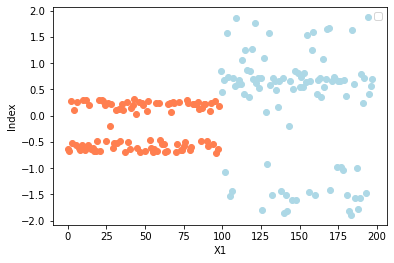

In [27]:
for i in range(len(X)):
    if y[i]==0:
      plt.scatter(index[i],X[i],c='coral')
    else:
      plt.scatter(index[i],X[i],c='lightblue')
plt.legend()
plt.xlabel("X1")
plt.ylabel("Index")
plt.show()

### c) On a 2D scatter plot, one can observe how two observations from two classes are different.

A) We use PCA to find correlations in features. However, there is no linearity in the graphs. After applying PCA, we can see that it is projected with respect to the X2 axis because X2 has higher variance than X1.

B) When we use MDS, Although the results are close to each other, the differences between classes are more distinctive because MDS uses the distances between the data and L1 form made more accurate classification than L2 form. In the graph of the L1 form, the border between the classes is clearly visible.

C) Although all the results were close to each other, the L1 form made the most significant distinction, while PCA was worse than the others. MDS handles nonlinearity better. The use of distance information made this difference.

### d) Suppose, you are not satisfied with your dimensionality reduction scheme in part (a).

In [28]:
data["X1^2"] = data.X1**2
data["X2^2"] = data.X2**2
data["X1*X2"] = data.X1 * data.X2
data.drop(["class"],axis=1, inplace=True)

In [29]:
print(data)

           X1        X2      X1^2      X2^2     X1*X2
0    0.569483  0.822003  0.324311  0.675689  0.468117
1    0.411469  0.911424  0.169307  0.830693  0.375023
2    0.417385 -0.908730  0.174210  0.825790 -0.379290
3   -0.791828  0.610745  0.626991  0.373009 -0.483604
4   -0.806777 -0.590857  0.650889  0.349111  0.476689
..        ...       ...       ...       ...       ...
193 -0.662932  1.886934  0.439479  3.560521 -1.250910
194  0.316428  1.974810  0.100127  3.899873  0.624885
195 -1.625464 -1.165275  2.642134  1.357866  1.894113
196 -1.378755 -1.448804  1.900966  2.099034  1.997547
197 -1.005258 -1.729005  1.010543  2.989457  1.738095

[198 rows x 5 columns]


In [30]:
pca2 = PCA(n_components =None)
df2_pca = pd.DataFrame(pca2.fit_transform(data), columns=["pc1", "pc2", "pc3", "pc4", "pc5"])

In [ ]:
# Eigenvalues, they refer to the variance explained on the corresponding component.
pca2.explained_variance_

array([2.49086525, 1.44256642, 1.28808119, 0.54559809, 0.30619998])

In [ ]:
# These are the percentages of these variances explained.
pca2.explained_variance_ratio_

array([0.410133  , 0.23752553, 0.21208879, 0.08983536, 0.05041731])

In [ ]:
# Eigenvectors, vectors that indicate how much contribution is done to the components by each original feature.
pca2.components_

array([[ 0.07766657,  0.71257596, -0.19184503,  0.66582496, -0.07794878],
       [-0.42317217, -0.07426701,  0.15328013,  0.27219612,  0.84724507],
       [ 0.21930469, -0.6092683 ,  0.27145989,  0.67993125, -0.21142519],
       [-0.73210164,  0.13942364,  0.49110581,  0.0249689 , -0.45031087],
       [ 0.4804434 ,  0.30995661,  0.79045892, -0.14020145,  0.16917239]])

In the first component, the dominant features are the square of x2 and x2 and explains 41% of the data. Secondly, second component explains 24% of the data.


##Task 2 – Reconstructing Turkey Map

In [85]:
distances = pd.read_excel("ilmesafe.xls", header=2, index_col=1)
orginal_values = distances.iloc[:,:].fillna(0).reset_index(drop=True)
distances = distances.iloc[:,1:].fillna(0).reset_index(drop=True)
distances

,ADANA,ADIYAMAN,AFYONKARAHİSAR,AĞRI,AMASYA,ANKARA,ANTALYA,ARTVİN,AYDIN,BALIKESİR,BİLECİK,BİNGÖL,BİTLİS,BOLU,BURDUR,BURSA,ÇANAKKALE,ÇANKIRI,ÇORUM,DENİZLİ,DİYARBAKIR,EDİRNE,ELAZIĞ,ERZİNCAN,ERZURUM,ESKİŞEHİR,GAZİANTEP,GİRESUN,GÜMÜŞHANE,HAKKARİ,HATAY,ISPARTA,MERSİN,İSTANBUL,İZMİR,KARS,KASTAMONU,KAYSERİ,KIRKLARELİ,KIRŞEHİR,...,KONYA,KÜTAHYA,MALATYA,MANİSA,KAHRAMANMARAŞ,MARDİN,MUĞLA,MUŞ,NEVŞEHİR,NİĞDE,ORDU,RİZE,SAKARYA (ADAPAZARI),SAMSUN,SİİRT,SİNOP,SİVAS,TEKİRDAĞ,TOKAT,TRABZON,TUNCELİ,ŞANLIURFA,UŞAK,VAN,YOZGAT,ZONGULDAK,AKSARAY,BAYBURT,KARAMAN,KIRIKKALE,BATMAN,ŞIRNAK,BARTIN,ARDAHAN,IĞDIR,YALOVA,KARABÜK,KİLİS,OSMANİYE,DÜZCE
0,0.0,335.0,575.0,966.0,603.0,567.0,535.0,1035.0,874.0,903.0,773.0,636.0,732.0,690.0,646.0,842.0,1094.0,577.0,581.0,755.0,525.0,1178.0,494.0,670.0,809.0,690.0,212.0,720.0,778.0,898.0,191.0,617.0,69.0,948.0,901.0,1014.0,683.0,335.0,1159.0,377.0,...,358.0,675.0,396.0,885.0,192.0,537.0,846.0,743.0,289.0,207.0,707.0,919.0,800.0,719.0,707.0,845.0,422.0,1079.0,491.0,844.0,628.0,349.0,690.0,893.0,489.0,765.0,267.0,800.0,292.0,477.0,621.0,709.0,782.0,1042.0,1066.0,899.0,714.0,246.0,87.0,735.0
1,335.0,0.0,910.0,648.0,632.0,814.0,870.0,751.0,1209.0,1238.0,1040.0,348.0,414.0,931.0,981.0,1109.0,1380.0,766.0,696.0,1090.0,207.0,1423.0,285.0,550.0,525.0,957.0,150.0,710.0,683.0,660.0,316.0,952.0,404.0,1193.0,1236.0,730.0,872.0,419.0,1404.0,553.0,...,693.0,1010.0,187.0,1220.0,163.0,299.0,1181.0,459.0,500.0,542.0,724.0,784.0,1045.0,748.0,389.0,888.0,412.0,1324.0,520.0,783.0,419.0,112.0,1025.0,575.0,616.0,1006.0,575.0,650.0,627.0,666.0,303.0,471.0,1023.0,758.0,748.0,1147.0,955.0,210.0,248.0,976.0
2,575.0,910.0,0.0,1318.0,597.0,300.0,290.0,1243.0,345.0,328.0,212.0,1095.0,1285.0,420.0,169.0,277.0,519.0,397.0,505.0,222.0,1100.0,684.0,953.0,948.0,1138.0,144.0,787.0,871.0,1015.0,1473.0,766.0,168.0,565.0,454.0,326.0,1340.0,503.0,521.0,665.0,426.0,...,223.0,100.0,855.0,310.0,767.0,1112.0,367.0,1202.0,440.0,459.0,827.0,1082.0,306.0,677.0,1282.0,675.0,703.0,585.0,643.0,1007.0,1079.0,924.0,115.0,1418.0,479.0,488.0,365.0,1037.0,336.0,339.0,1196.0,1284.0,515.0,1351.0,1461.0,338.0,447.0,821.0,662.0,375.0
3,966.0,648.0,1318.0,0.0,738.0,1141.0,1428.0,396.0,1640.0,1569.0,1361.0,356.0,234.0,1147.0,1423.0,1418.0,1689.0,986.0,830.0,1517.0,441.0,1639.0,496.0,370.0,183.0,1295.0,754.0,545.0,383.0,425.0,947.0,1373.0,1035.0,1409.0,1640.0,216.0,992.0,812.0,1620.0,942.0,...,1114.0,1373.0,592.0,1624.0,811.0,519.0,1662.0,245.0,891.0,938.0,589.0,439.0,1261.0,739.0,330.0,894.0,618.0,1540.0,675.0,476.0,423.0,617.0,1429.0,228.0,842.0,1206.0,966.0,305.0,1114.0,979.0,369.0,430.0,1175.0,310.0,143.0,1363.0,1106.0,814.0,879.0,1192.0
4,603.0,632.0,597.0,736.0,0.0,413.0,825.0,695.0,938.0,831.0,623.0,643.0,833.0,409.0,762.0,680.0,951.0,248.0,92.0,815.0,696.0,901.0,543.0,368.0,558.0,574.0,579.0,323.0,435.0,1133.0,676.0,719.0,639.0,671.0,919.0,760.0,254.0,346.0,882.0,312.0,...,511.0,652.0,463.0,903.0,503.0,792.0,960.0,750.0,361.0,439.0,279.0,534.0,523.0,131.0,882.0,258.0,220.0,802.0,114.0,459.0,499.0,716.0,708.0,966.0,200.0,468.0,422.0,457.0,615.0,258.0,796.0,982.0,437.0,783.0,881.0,625.0,368.0,639.0,608.0,454.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,899.0,1152.0,338.0,1361.0,625.0,407.0,601.0,1254.0,510.0,216.0,126.0,1266.0,1456.0,216.0,479.0,69.0,336.0,449.0,568.0,501.0,1311.0,406.0,1160.0,991.0,1181.0,209.0,1065.0,882.0,1044.0,1751.0,1090.0,478.0,889.0,176.0,390.0,1381.0,461.0,728.0,387.0,594.0,...,547.0,238.0,1062.0,355.0,989.0,1390.0,608.0,1373.0,685.0,757.0,838.0,1093.0,102.0,688.0,1497.0,633.0,845.0,307.0,739.0,1018.0,1122.0,1202.0,375.0,1589.0,625.0,284.0,635.0,1080.0,660.0,485.0,1411.0,1562.0,371.0,1362.0,1472.0,0.0,350.0,1120.0,987.0,171.0
77,714.0,960.0,447.0,1104.0,368.0,215


Since the matrix is ​​not symmetrical, a symmetric matrix should be created by taking the average of 2 values.

In [31]:
lower_matrix = np.tril(distances)
upper_matrix = np.triu(distances)
sym_lower_matrix = (lower_matrix + upper_matrix.T)/2
sym_distances = sym_lower_matrix + sym_lower_matrix.T
sym_distances

array([[  0. , 335. , 575. , ..., 246. ,  87. , 735. ],
       [335. ,   0. , 910. , ..., 210. , 248. , 978.5],
       [575. , 910. ,   0. , ..., 821. , 662. , 375. ],
       ...,
       [246. , 210. , 821. , ...,   0. , 159. , 951.5],
       [ 87. , 248. , 662. , ..., 159. ,   0. , 822. ],
       [735. , 978.5, 375. , ..., 951.5, 822. ,   0. ]])

In [88]:
mds = MDS(n_components=2, dissimilarity="precomputed")
mds_dim = mds.fit_transform(sym_distances)
distances[["MDS1", "MDS2"]] = mds_dim

In [89]:
cities=["Adana", "Adıyaman", "Afyon", "Ağrı", "Amasya", "Ankara", "Antalya", "Artvin", "Aydın", "Balıkesir", "Bilecik", "Bingöl", "Bitlis", "Bolu", "Burdur", "Bursa", "Çanakkale", "Çankırı", "Çorum", "Denizli", "Diyarbakır", "Edirne", "Elazığ", "Erzincan", "Erzurum", "Eskişehir", "Gaziantep", "Giresun", "Gümüşhane", "Hakkari", "Hatay", "Isparta", "İçel (Mersin)", "İstanbul", "İzmir", "Kars", "Kastamonu", "Kayseri", "Kırklareli", "Kırşehir", "Kocaeli", "Konya", "Kütahya", "Malatya", "Manisa", "Kahramanmaraş", "Mardin", "Muğla", "Muş", "Nevşehir", "Niğde", "Ordu", "Rize", "Sakarya", "Samsun", "Siirt", "Sinop", "Sivas", "Tekirdağ", "Tokat", "Trabzon", "Tunceli", "Şanlıurfa", "Uşak", "Van", "Yozgat", "Zonguldak", "Aksaray", "Bayburt", "Karaman", "Kırıkkale", "Batman", "Şırnak", "Bartın", "Ardahan", "Iğdır", "Yalova", "Karabük", "Kilis", "Osmaniye", "Düzce"
]


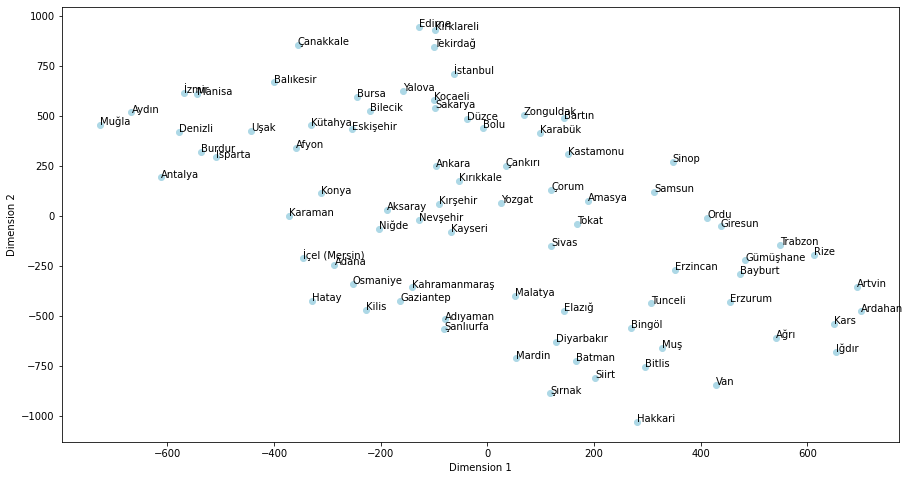

In [102]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(8)
plt.scatter(-distances.MDS1, -distances.MDS2,c='lightblue')
for i in range(len(mds_dim)):
    plt.annotate(cities[i], (-distances.MDS1[i],-distances.MDS2[i]))
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

The distance between some cities is seen more than usual. Mountainous regions may have caused this error.

In [ ]:
%%shell
jupyter nbconvert --to html /content/IE582_Fall21_Homework2.ipynb